<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

# **Diferentes Métricas de Classificação**
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Interpretar uma Matriz de confusão
* Interpretar uma Curva ROC
* Calcular e interpretar os indicadores de um modelo de classificação



# Importar bibliotecas e ler os dados

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Preparação do DataFrame



# Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

#Demosntraremos essas métrica rapidamente com um modelo default random forest
rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

O que é acurácia:

$$Acurácia = \frac{VP + VN}{VP + VN + FP + FN}$$
Onde TP = verdadeiros positivos, TN = verdadeiros negativos, FP = falsos positivos, FN = falsos negativos.

O que é precision:

$$Precision = \frac{VP}{VP + FP}$$

O que é recall:

$$Recall = \frac{VP}{VP + FN}$$

O que é f1-score:

$$F1-score = 2\cdot\frac{precision\cdot recall}{precision + recall}$$

O que é ROC e AUC:

ROC é uma curva entre as taxas de verdadeiros positivos e falsos positivos. AUC é simplesmente a área abaixo deta curva.

Random Forest accuracy: 0.9415204678362573
Random Forest precision: 0.944954128440367
Random Forest recall: 0.9626168224299065
Random Forest f1: 0.9537037037037037
Random Forest roc_auc: 0.9344334112149533


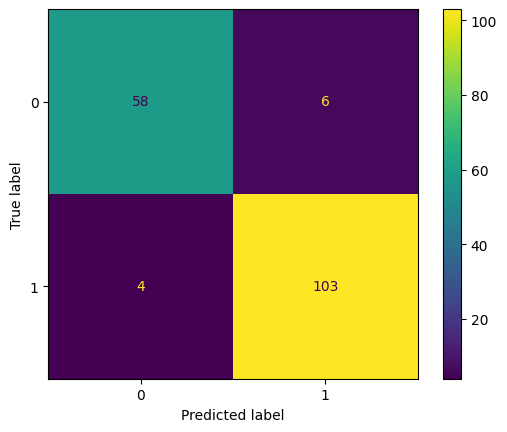

In [4]:
print(f'Random Forest accuracy: {accuracy_score(y_test,pred_rf)}')
print(f'Random Forest precision: {precision_score(y_test,pred_rf)}')
print(f'Random Forest recall: {recall_score(y_test,pred_rf)}')
print(f'Random Forest f1: {f1_score(y_test,pred_rf)}')
print(f'Random Forest roc_auc: {roc_auc_score(y_test,pred_rf)}')

cf_matrix_rf = confusion_matrix(y_test,pred_rf, labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix = cf_matrix_rf,
                       display_labels=rf.classes_).plot()

In [5]:
TN, FP, FN, TP = cf_matrix_rf.ravel()
print(f"TN = {TN}, FP = {FP}, FN = {FN}, TP = {TP}")

TN = 58, FP = 6, FN = 4, TP = 103


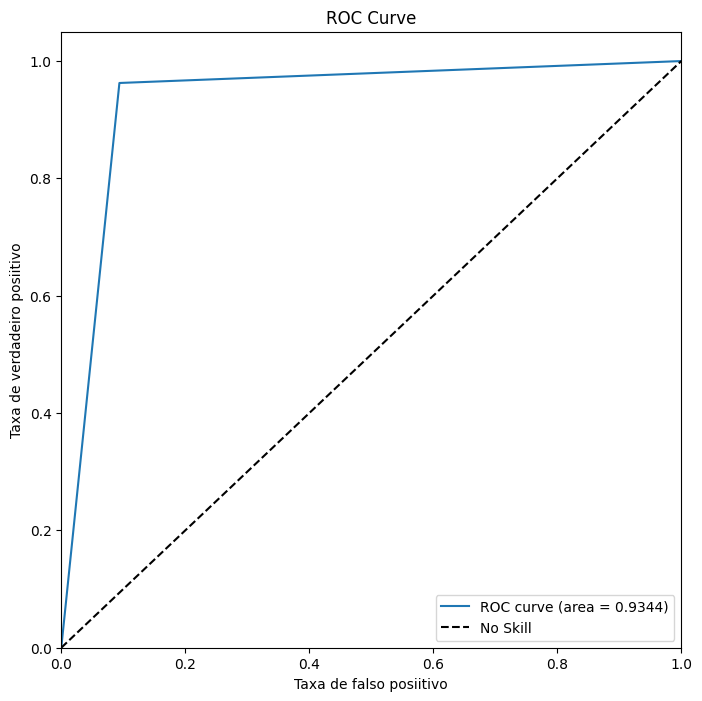

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = roc_auc_score(y_test,pred_rf)

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--', label='No Skill')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Taxa de falso posiitivo')
ax.set_ylabel('Taxa de verdadeiro posiitivo')
plt.title('ROC Curve')
ax.legend()
plt.show()

## Autor

<a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 06-11-2024       | 1.0     | João Gabriel    | Inicial              |
| 28-05-2025       | 1.1     | Pécora    | BreastCancer              |

<hr>